# Module 4: Understanding Language Syntax and Structure 

## Table of Contents
<br>

<a href="#Module 4: Understanding Language Syntax and Structure"><font size="+1">Module 4: Understanding Language Syntax and Structure</font></a>
<ol>
  <li>Parts of Speech (POS) Tagging</li>
  <li>Named Entity Recognition</li>
  <li>Shallow Parsing or Chunking</li>
  <li>Deep Parsing</li>
  <li>Constituency Parsing</li>
  <li>Dependency Parsing</li>
  <li> Difference between constituency parser and dependency parser
</li>
</ol>

**Learning Outcomes:** 

Describe and execute the following operations on text using the nltk and stanza(stanfordnlp) libraries:-

* Part of Speech tagging
* Named Entity Recognition
* Shallow Parsing or Chunking
* Deep Parsing
* Constituency Parsing
* Dependency Parsing - both Constituency Parsing and Dependency Parsing
<br>

Additionally you should be able to:


* Provide a brief desciption on the difference between Constituency Parsing and Dependency Parsing

<br>


## 4.1 Parts of Speech (POS) Tagging
<br>

Parts of speech (also known as POS, word classes, or syntactic categories) are useful because they reveal a lot about a word and its neighbors. Knowing whether a word is a noun or a verb tells us about likely neighboring words (nouns are preceded by determiners and adjectives, verbs by nouns) and syntactic structure (nouns are generally part of noun phrases). This makes part-of-speech tagging a key aspect of parsing. Parts of speech are useful features for labeling named entities like people or organizations in information extraction or for coreference resolution (Jurafsky and Martin, 2019).


Parts of speech are traditionally defined on a words syntactic and morphological function, grouping words that have similar neighboring words (their distributional properties) or take similar affixes (their morphological properties).


Parts of speech can be divided into two broad supercategories: <span style="color:blue">closed class </span> types and   <span style="color:blue">open class.</span>   Closed classes are those with relatively fixed membership, such as prepositions—new prepositions are rarely coined. By contrast, nouns and verbs are open classes—new nouns and verbs like *iPhone* or to *fax* are continually being created or borrowed. Any given speaker or corpus may have different open class words, but all speakers of a language, and sufficiently large corpora, likely function word share the set of closed class words. Closed class words are generally <span style="color:blue">function</span> words like *of, it, and, or you,* which tend to be very short, occur frequently, and often have structuring uses in grammar. Four major open classes occur in the languages of the world: <span style="color:blue"> nouns, verbs, adjectives, and adverbs</span> (Jurafsky and Martin, 2019).
<br>

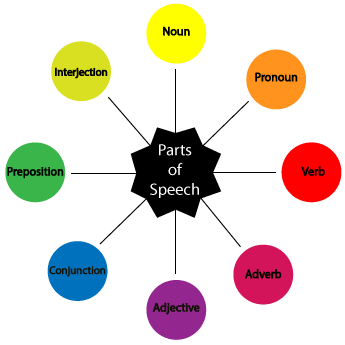

<br>

<span style="color:blue">Part-of-speech tagging </span> is the process of assigning a part-of-speech marker to each part-of-speech tagging word in an input text. The input to a tagging algorithm is a sequence of (tokenized) words and a tagset, and the output is a sequence of tags, one per token. The most popular tag set is Penn Treebank tagset. The tagging algorithms (POS tagging is a supervised learning solution) typically are based on either the <span style="color:blue"> Maximum Entropy Markov Models or Hidden Markov Model</span>.
<br>

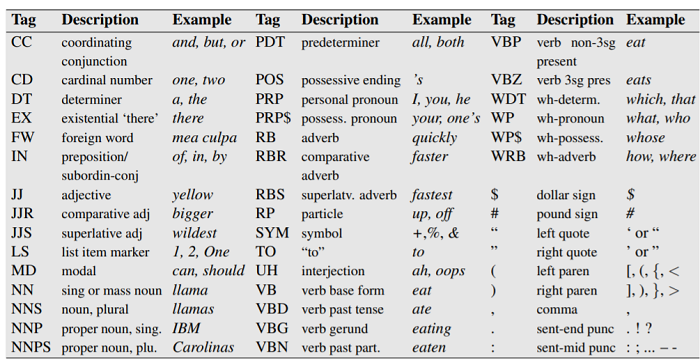
<center>Penn Treebank part-of-speech tags (including punctuation)</center>
<br>



In [ ]:
import nltk
nltk.data.path.append("../pre_course/nltk_data")
import pandas as pd
from nltk.collocations import *
import string
import stanza

In [ ]:
patents = pd.read_pickle('../data/Patent_Dataset.pkl')

In [ ]:
#fix index
patents.index = [i for i in range(0, len(patents))]

In [ ]:
def lowercase(ptext):
    return ptext.lower()

def tokens_sentences(ptext):
    return nltk.sent_tokenize(ptext) 

def word_tokenisation(ptexts):
    return [nltk.word_tokenize(sent) for sent in ptexts] 

### 4.1.1 POS tagging - Using NLTK


In [ ]:
# Function to perform parts of speech tagging to a list of sentences
def pos_tagging(ptext):
    return [nltk.pos_tag(sent) for sent in ptext] 

In [ ]:
patents.head()

In [ ]:
def preprocessing(raw_text):
    """Function for all preprocessing text data"""
    
    lowercased = lowercase(raw_text)
    sentences = tokens_sentences(lowercased)
    sentences_tokened = word_tokenisation(sentences)
    POS_sentences_tokened = pos_tagging(sentences_tokened)
    
    return POS_sentences_tokened

In [ ]:
# Each entry in the abstract column is a string
patents.loc[0,'abstract']

In [ ]:
patents['pos_nltk'] = patents['abstract'].apply(preprocessing)

In [ ]:
patents.loc[0,'pos_nltk']

### 4.1.2 POS tagging - Using Stanza 

This may not work on some networked devices.

In [ ]:
nlp = stanza.Pipeline(lang='en', processors='tokenize,pos')

In [ ]:
#  the code below applies the NLP pipeline as set and defined above to selected text
def stanza_pos(ptext):
    return nlp(ptext)

In [ ]:
patents['stanza_pos'] = patents['abstract'].apply(stanza_pos)

In [ ]:
patents.loc[1,'stanza_pos']

In [ ]:
patents.iloc[1,5]

## 4.2 Named Entity Recognition

Named entity recognition (NER) is an information extraction technique that automatically identifies named entities in a text and classifies them into predefined categories. Entities can be names of people, organizations, locations, times, quantities, monetary values, percentages, and more.
<br>
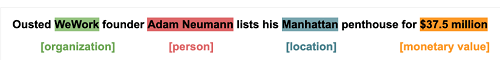
<br>


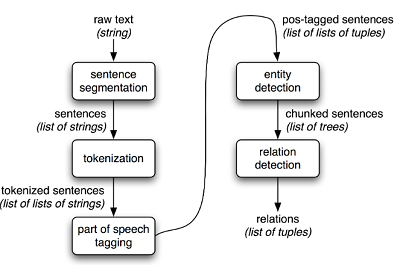

<br>


The above is simple Pipeline Architecture for an Information Extraction System. This system takes the raw text of a document as its input, and generates a list of (entity, relation, entity) tuples as its output. 

For example, given a document that indicates that the company Georgia-Pacific is located in Atlanta, it might generate the tuple `([ORG: 'Georgia-Pacific'], 'in', [LOC: 'Atlanta'])`.

NER  can help answering many real-world questions, such as:

<ul>
  <li>Which companies were mentioned in the news article?</li>
  <li>Were specified products mentioned in complaints or reviews?</li>
  <li>Does the tweet contain the name of a person? Does the tweet contain this person’s location?</li>
</ul>

Machine learning-based systems are the common way of building entity extraction system. 
In NLTK this is undertaken via a chunking process as descibed below.



## 4.3 Shallow Parsing or Chunking

Chunking (or shallow parsing) analyzes a sentence to identify the constituents (noun groups, verbs, verb groups, etc.). However, it does not specify their internal structure, nor their role in the main sentence.
<br>

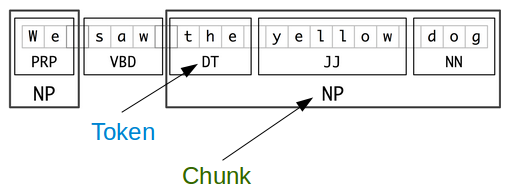

<br>

The smaller boxes show the word-level tokenization and part-of-speech tagging, while the large boxes show higher-level chunking. Each of these larger boxes is called a chunk.

Chunking can break sentences into phrases that are more useful than individual words and yield meaningful results.

Sentences typically follows a hierarchical structure consisting of the following components.

sentence → clauses → phrases → words

Group of words make up phrases and there are five major categories.

<ul>
  <li>Noun Phrase (NP)</li>
  <li>Verb phrase (VP)</li>
  <li>Adjective phrase (ADJP)</li>
  <li>Adverb phrase (VP)</li>
  <li>Prepositional phrase (PP)</li>
</ul>

The above are the 'chunks' that would be retrieved in a shallow parse.



With the function <span style="color:blue">nltk.ne_chunk()</span>, we can recognize named entities using a classifier, the classifier adds category labels such as PERSON, ORGANIZATION, and GPE.

In [ ]:
patents.head()

In [ ]:
patents.iloc[1,5]

### 4.3.1 NER - Using NLTK

In [ ]:
# Function to perform NER tagging on list of texts
def ner_tagging(ptexts):
    return [nltk.ne_chunk(sent) for sent in ptexts] 

In [ ]:
patents.iloc[1,4][0]

In [ ]:
patents['ner_nltk'] = patents['pos_nltk'].apply(ner_tagging)

Applying the ner_tagging function results in a tag  [Tree('S'..] to mark out sentences where regular expression can be applied.

In [ ]:
patents.iloc[1,6]

In [ ]:
patents.head()

In [ ]:
patents.iloc[1,4][0]

Now we’ll implement <span style="color:blue">noun phrase chunking</span> to identify named entities using a <span style="color:blue"> regular expression </span> consisting of rules that indicate how sentences should be chunked. The chunk pattern consists of one rule, that a noun phrase, NP, should be formed whenever the chunker finds an optional determiner, DT, followed by any number of adjectives, JJ, and then a noun, NN.

In [ ]:
# optional determiner, adjective then a noun 
pattern = 'NP: {<DT>?<JJ>*<NN>}'

In [ ]:
nltk_parser = nltk.RegexpParser(pattern)
apply_pattern = nltk_parser.parse(patents.iloc[1,4][0])
print(apply_pattern)

In [ ]:
def ner_tagging2(ptext):
    nltk_parser = nltk.RegexpParser(pattern)
    return [nltk_parser.parse(sent) for sent in ptext] 

In [ ]:
patents['chunking_nltk'] = patents['ner_nltk'].apply(ner_tagging2)

In [ ]:
patents.head()

In [ ]:
patents.iloc[1,7]

In [ ]:
patents.head()

### 4.3.2 NER - Using Stanza

In [ ]:
nlp = stanza.Pipeline(lang='en', processors='tokenize,ner')

In [ ]:
##Example tags

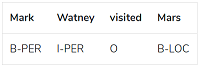

In [ ]:
text = "Chris Manning teaches at Stanford University. He lives in the Bay Area."
doc = nlp(text)
for sent in doc.sentences:
    print(sent)
    for ent in sent.ents:
        print(ent, ent.text, ent.type)

In [ ]:
def stanza_ner(ptext):
    named_entities = []
    doc = nlp(ptext)
    for sent in doc.sentences:
        for entity in sent.ents:
            named_entities.append([entity.text, entity.type])
    return named_entities

In [ ]:
patents.head()

In [ ]:
patents.columns

In [ ]:
patents['stanza_ner'] = patents['abstract'].apply(stanza_ner)

In [ ]:
patents.index = list(range(len(patents)))

In [ ]:
patents.head()

In [ ]:
patents.iloc[1,1]

In [ ]:
patents.loc[1,'stanza_ner']


## 4.4 Deep Parsing

Natural language parsing (also known as deep parsing) is a process of analyzing the complete syntactic structure of a sentence. This includes how different words in a sentence are related to each other, for example, which words are the subject or object of a verb. 

Parsing is used to solve various complex NLP problems such as conversational dialogues and text summarization. It is different from 'shallow parsing' in that it yields more expressive structural representations which directly capture long-distance dependencies and underlying predicate-argument structures.

There are two main types of parse tree structures - constituency parsing and dependency parsing.


## 4.5 Constituency Parsing


The most widely used formal system for modeling constituent structure in English and other natural languages is the Context-Free Grammar, or CFG. Context-free grammars are also called Phrase-Structure Grammars.

A constituency parsed tree displays the syntactic structure of a sentence using context-free grammar.

A context-free grammar consists of a set of rules or productions, each of which expresses the ways that symbols of the language can be grouped and ordered together.
<br>

See this example grammar below, where each line indicates a rule of the grammar to be applied to an example sentence “Tom ate an apple”.


*An example grammar*

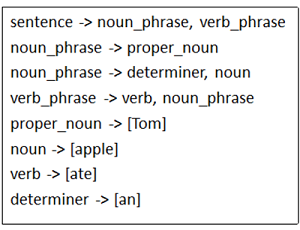

<br>
If we now strip out the words apart from the topmost row, add an S (sentence) node, and flip the figure over, we end up with a standard phrase structure tree, shown below. Each node in this tree (including the words) is called a <span style="color:blue"> constituent</span>. The immediate constituents of *S are NP and VP*.

A constituency parser can be built based on such grammars/rules, which are usually collectively available as context-free grammar (CFG) or phrase-structured grammar. The parser will process input sentences according to these rules, and help in building a parse tree.

The outcome of the parsing process would be a parse tree like the following, where <span style="color:blue">sentence</span> is the root, intermediate nodes such as <span style="color:blue">noun_phrase, verb_phrase </span> etc. have children - hence they are called  <span style="color:blue">non-terminals</span> and finally, the leaves of the tree <span style="color:blue">‘Tom’, ‘ate’, ‘an’, ‘apple’</span> are called  <span style="color:blue">terminals</span>.


<br>


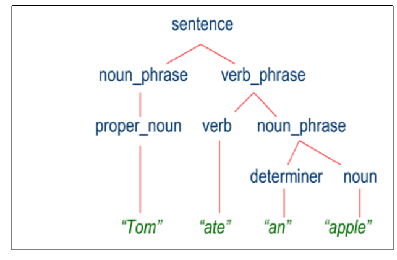


<br>


The biggest problem that arises with constituency parsing is structural ambiguity. This occurs when there are multiple grammatical interpretations of a sentence resulting in more than one syntactic analysis

The constituency grammars we introduce here, however, are not the only possible formal mechanism for modeling syntax. An alternative model that is the core representation for dependency parsing. Both constituency and dependency formalisms are important for language processing.

<br>


## 4.6 Dependency Parsing

<br>

Dependency parsing is the process of defining the grammatical structure of a sentence by listing each word as a node and displaying links to its dependents.

Dependency Parsing: Probably the most popular type of parse. It implies finding the dependencies between the words and also their type.

Dependency parsing differs from syntactical parsing as it uses dependency grammar and displays only the relationships between words rather than the sentence structure and relationship. Dependency trees are often more concise than constituency trees because they only display grammar between a governor and is dependents.

A distinct and complementary approach to CFG, dependency grammar, focusses instead on how words relate to other words. The head of a sentence is usually taken to be the tensed verb, and every other word is either dependent on the sentence head, or connects to it through a path of dependencies.
<br>

Here’s a quick example


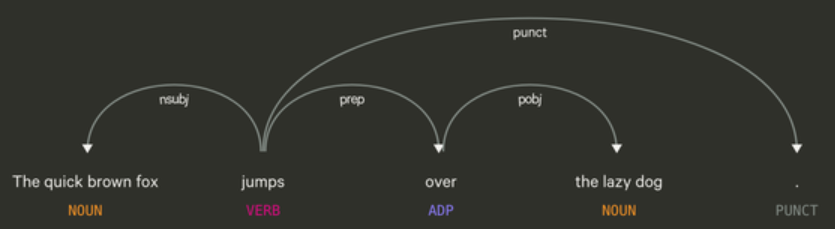
<br>



Depending on what you need to do you can find useful one or the other.

## 4.7 Difference between constituency parser and dependency parser


A constituency parse tree breaks a text into sub-phrases.
Non-terminals in the tree are types of phrases, the terminals are the words in the sentence, and the edges are unlabeled.
For a simple sentence *John sees Bill*, a constituency parse would be:

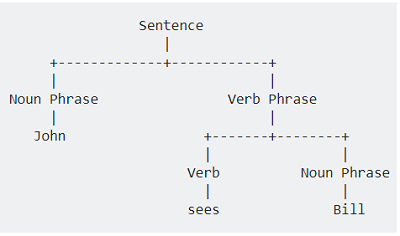

A dependency parse connects words according to their relationships. Each vertex in the tree represents a word, child nodes are words that are dependent on the parent, and edges are labeled by the relationship. A dependency parse of *John sees Bill*, would be
<br>

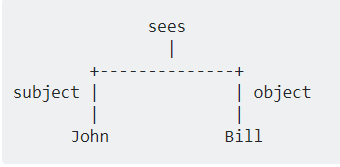









Use the parser type that gets you closest to your goal. If you are interested in sub-phrases within the sentence, you probably want the constituency parse. If you are interested in the dependency relationships between words, then you probably want the dependency parse.

The Stanford parser can give you either. In fact, the way it really works is to always parse the sentence with the constituency parser, and then, if needed, it performs a deterministic (rule-based) transformation on the constituency parse tree to convert it into a dependency tree.

For some networked devices the code below will not work.

In [ ]:
# Dependency parsing using stanza

In [ ]:
nlp = stanza.Pipeline(lang='en', processors='tokenize,mwt,pos,lemma,depparse')
doc = nlp('Jack and Jill went up the hill to fetch a pail of water. Jack fell down and came tumbling down. Jill stood aghast')
print(*[f'id: {word.id}\tword: {word.text}\thead id: {word.head}\thead: {sent.words[word.head-1].text if word.head > 0 else "root"}\tdeprel: {word.deprel}' for sent in doc.sentences for word in sent.words], sep='\n')

In [ ]:
for sentence in doc.sentences:
    for word in sentence.words:
        print(word.text, word.deprel)

In [ ]:
def stanza_depparse(raw_data):
    doc = nlp(raw_data)
    named_entities = []
    for sentences in doc.sentences:
        for word in sentences.words:
            named_entities.append([word.text, word.deprel])
    return named_entities

In [ ]:
patents['stanza_depparse'] = patents['abstract'].apply(stanza_depparse)

In [ ]:
patents.head()

In [ ]:
patents.iloc[2,1]

In [ ]:
patents.iloc[2,9]

#### Exercise
<br>

<ol>
  <li>Import the Hep Dataset. To the text column, execute the following steps:-</li>
        
        Apply POS tagging using nltk.
        Apply POS tagging using Stanza.
        Set up a regular expression to pick up all adjective/noun pairs using nltk on a value in the Text column.
        Identify all tokens in text that are POS tagged that match this pattern(adjective/noun).
        Apply Stanza pipeline that includes NER to a value in the text column.
        Apply dependency parsing to a value in a text column.
      

Guidelines: 

* Change the "Text" columnn from list to a string before undertaking any operations.  <br>
* Perform the above steps in the same way as done to the patent dataset abstract column. <br>
* Make a copy of the df once loaded in using copy() <br>



#### References


https://stackoverflow.com/questions/10401076/difference-between-constituency-parser-and-dependency-parser
https://monkeylearn.com/blog/named-entity-recognition/

https://towardsdatascience.com/named-entity-recognition-with-nltk-and-spacy-8c4a7d88e7da
